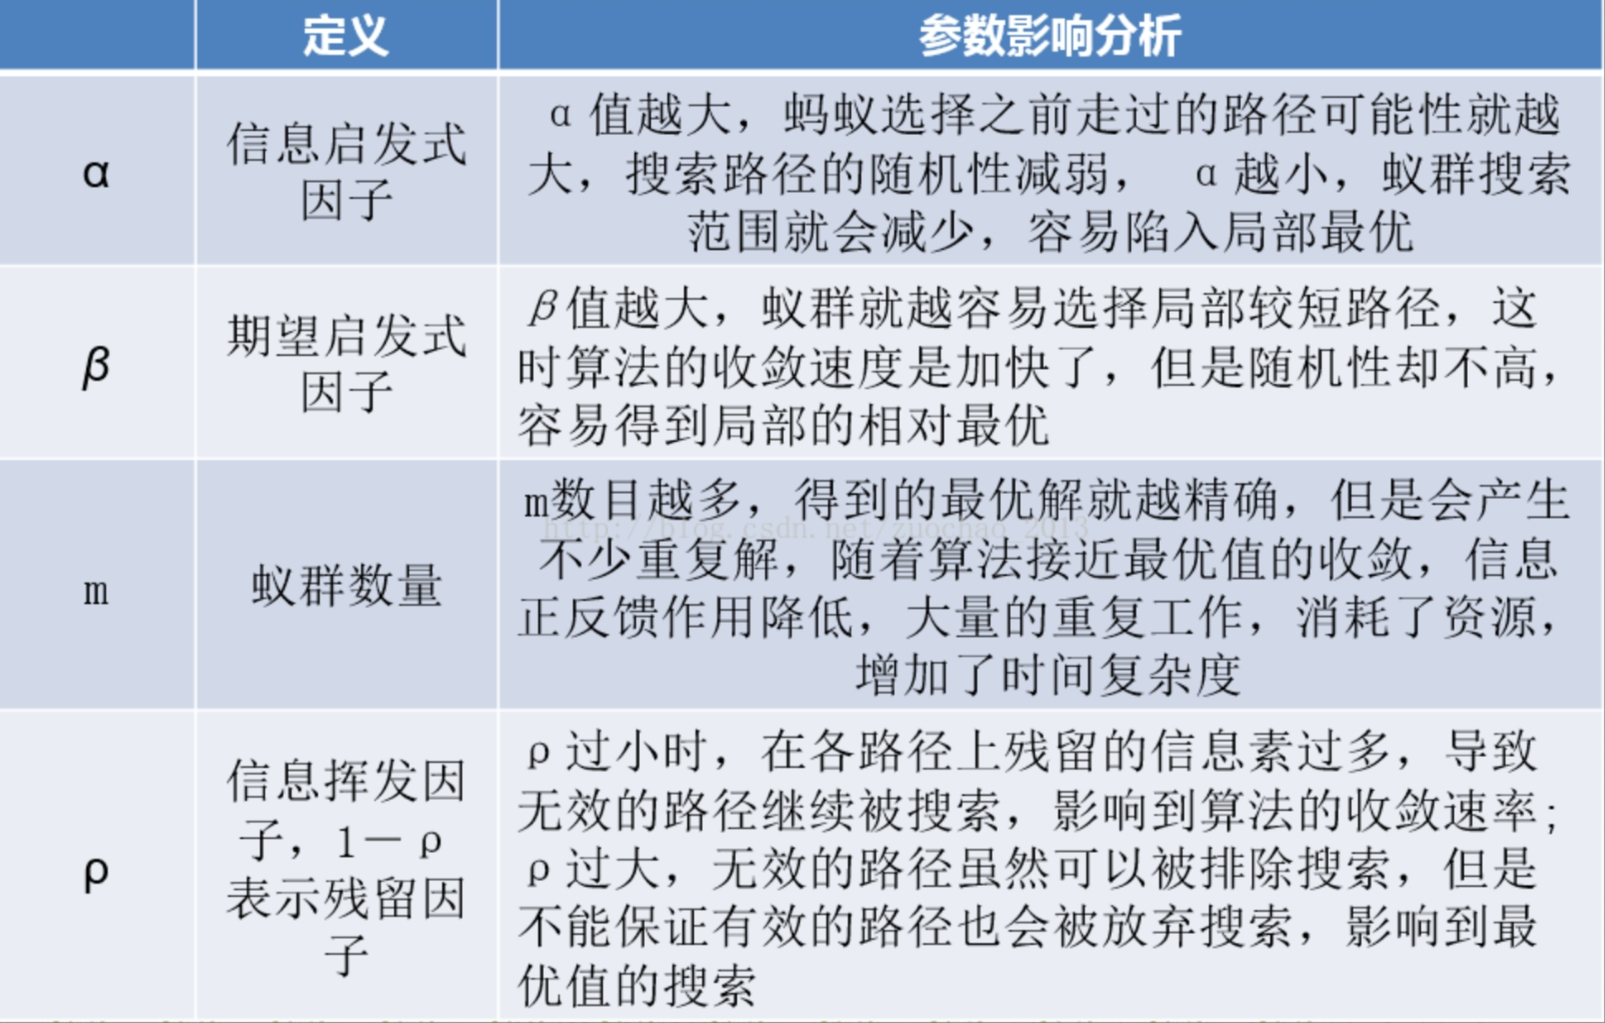

iter(迭代次数): 0
iter(迭代次数): 30
iter(迭代次数): 60
iter(迭代次数): 90
iter(迭代次数): 120
iter(迭代次数): 150
iter(迭代次数): 180
[10930.20314099 10708.02376013 10654.043556   10536.94248847
 10594.84449542 10515.91653569 10382.26773551 10326.65106144
 10393.92297668 10321.1844899  10177.12659521 10176.29817455
 10113.6542309  10079.51124647 10181.50878803 10218.32750864
 10107.71078446 10025.76981376  9864.38444442  9918.02772265
 10024.57986933 10010.57327792  9863.59258177  9968.70000666
  9848.58852423  9762.80259192  9760.43050068  9880.90082073
  9565.90017268  9670.67316206  9700.13276012  9689.53833194
  9706.3093851   9572.99905238  9605.51626375  9608.6983221
  9650.46169476  9527.26003783  9507.81997377  9464.37850389
  9379.33177542  9679.85067498  9543.21020381  9512.56936086
  9403.73695278  9510.45127504  9444.92577204  9486.35816226
  9421.71874894  9392.80519565  9414.68173098  9321.75669102
  9342.97932635  9513.56584961  9437.07258235  9411.09385858
  9434.89147707  9302.25305802  9356.266

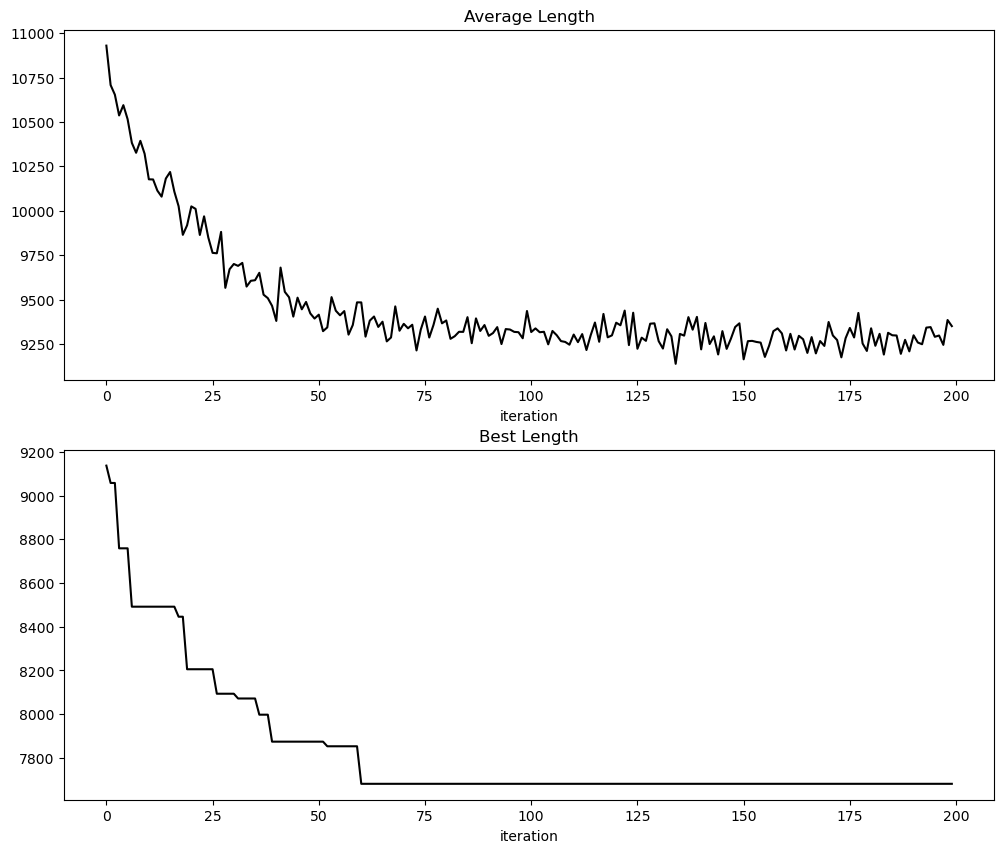

C:\Users\16619\AppData\Local\Temp\ipykernel_144176\3515500674.py:119: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(coordinates[:, 0], coordinates[:, 1], 'r.', marker=u'$\cdot$')


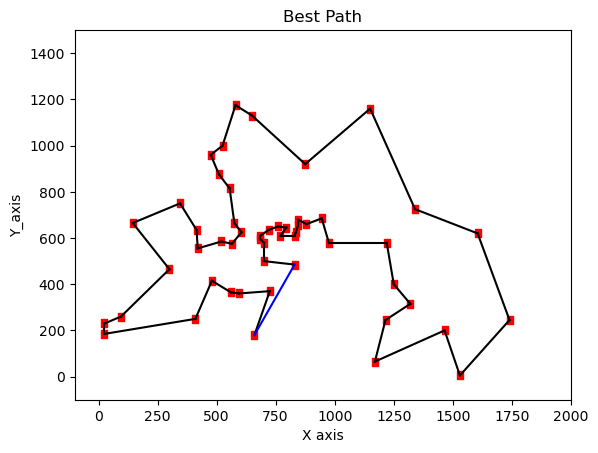

1


In [6]:
import numpy as np
import matplotlib.pyplot as plt


# 城市坐标(52个城市)
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],
            [880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],
            [1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,  5.0],[845.0,680.0],
            [725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],
            [300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],
            [1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],
            [420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],
            [685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],
            [475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],
            [830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],
            [1340.0,725.0],[1740.0,245.0]])

def getdistmat(coordinates):   #求坐标间距离
    num = coordinates.shape[0]
    distmat = np.zeros((52, 52))
    for i in range(num):
        for j in range(i, num):
            distmat[i][j] = distmat[j][i] = np.linalg.norm(
                coordinates[i] - coordinates[j])  #求范数，默认sqrt(x1**2+x2**2....)
    return distmat


# #//初始化
distmat = getdistmat(coordinates)
numant = 78 ##// 蚂蚁个数
numcity = coordinates.shape[0] ##// 城市个数
alpha = 1 ##// 信息素重要程度因子
beta = 5 ##// 启发函数重要程度因子
rho = 0.1 ##// 信息素的挥发速度
Q = 1 ##//信息素释放总量
iter = 0##//循环次数
itermax = 200#//循环最大值
etatable = 1.0 / (distmat + np.diag([1e10] * numcity)) #// 启发函数矩阵，表示蚂蚁从城市i转移到矩阵j的期望程度
pheromonetable = np.ones((numcity, numcity)) #// 信息素矩阵
pathtable = np.zeros((numant, numcity)).astype(int) #// 路径记录表
distmat = getdistmat(coordinates) #// 城市的距离矩阵
lengthaver = np.zeros(itermax) #// 各代路径的平均长度
lengthbest = np.zeros(itermax) #// 各代及其之前遇到的最佳路径长度
pathbest = np.zeros((itermax, numcity)) #// 各代及其之前遇到的最佳路径长度
#//核心点-循环迭代
while iter < itermax:
    #// 随机产生各个蚂蚁的起点城市
    if numant <= numcity:
        #// 城市数比蚂蚁数多
        pathtable[:, 0] = np.random.permutation(range(0, numcity))[:numant]
    else:
        #// 蚂蚁数比城市数多，需要补足
        pathtable[:numcity, 0] = np.random.permutation(range(0, numcity))[:]
        pathtable[numcity:, 0] = np.random.permutation(range(0, numcity))[
            :numant - numcity]
    length = np.zeros(numant)  # 计算各个蚂蚁的路径距离
    for i in range(numant):
        visiting = pathtable[i, 0]  # 当前所在的城市
        unvisited = set(range(numcity))  # 未访问的城市,以集合的形式存储{}
        unvisited.remove(visiting)  # 删除元素；利用集合的remove方法删除存储的数据内容
        for j in range(1, numcity):  # 循环numcity-1次，访问剩余的numcity-1个城市
            # 每次用轮盘法选择下一个要访问的城市
            listunvisited = list(unvisited)
            probtrans = np.zeros(len(listunvisited))
            for k in range(len(listunvisited)):
                probtrans[k] = np.power(pheromonetable[visiting][listunvisited[k]], alpha) \
                    * np.power(etatable[visiting][listunvisited[k]], beta)
            cumsumprobtrans = (probtrans / sum(probtrans)).cumsum()
            cumsumprobtrans -= np.random.rand()
            k = listunvisited[(np.where(cumsumprobtrans > 0)[0])[0]]
            # 元素的提取（也就是下一轮选的城市）
            pathtable[i, j] = k  # 添加到路径表中（也就是蚂蚁走过的路径)
            unvisited.remove(k)  # 然后在为访问城市set中remove（）删除掉该城市
            length[i] += distmat[visiting][k]
            visiting = k
        # 蚂蚁的路径距离包括最后一个城市和第一个城市的距离
        length[i] += distmat[visiting][pathtable[i, 0]]
        # 包含所有蚂蚁的一个迭代结束后，统计本次迭代的若干统计参数
    lengthaver[iter] = length.mean()
    if iter == 0:
        lengthbest[iter] = length.min()
        pathbest[iter] = pathtable[length.argmin()].copy()
    else:
        if length.min() > lengthbest[iter - 1]:
            lengthbest[iter] = lengthbest[iter - 1]
            pathbest[iter] = pathbest[iter - 1].copy()
        else:
            lengthbest[iter] = length.min()
            pathbest[iter] = pathtable[length.argmin()].copy()
    # 更新信息素
    changepheromonetable = np.zeros((numcity, numcity))
    for i in range(numant):
        for j in range(numcity - 1):
            changepheromonetable[pathtable[i, j]][pathtable[i, j + 1]] += Q / distmat[pathtable[i, j]][
                pathtable[i, j + 1]]  # 计算信息素增量
        changepheromonetable[pathtable[i, j + 1]][pathtable[i, 0]] += Q / distmat[pathtable[i, j + 1]][pathtable[i, 0]]
    pheromonetable = (1 - rho) * pheromonetable + \
        changepheromonetable  # 计算信息素公式
    if iter%30==0:
        print("iter(迭代次数):", iter)
    iter += 1  # 迭代次数指示器+1

# 做出平均路径长度和最优路径长度
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
axes[0].plot(lengthaver, 'k', marker=u'')
print(lengthaver)
axes[0].set_title('Average Length')
axes[0].set_xlabel(u'iteration')

axes[1].plot(lengthbest, 'k', marker=u'')
print(lengthbest)
axes[1].set_title('Best Length')
axes[1].set_xlabel(u'iteration')
fig.savefig('average_best.png', dpi=500, bbox_inches='tight')
plt.show()

# 作出找到的最优路径图
bestpath = pathbest[-1]
plt.plot(coordinates[:, 0], coordinates[:, 1], 'r.', marker=u'$\cdot$')
plt.xlim([-100, 2000])
plt.ylim([-100, 1500])

for i in range(numcity - 1):
    m = int(bestpath[i])
    n = int(bestpath[i + 1])
    plt.plot([coordinates[m][0], coordinates[n][0]], [
             coordinates[m][1], coordinates[n][1]], 'k')
plt.plot([coordinates[int(bestpath[0])][0], coordinates[int(n)][0]],
         [coordinates[int(bestpath[0])][1], coordinates[int(n)][1]], 'b')
ax = plt.gca()
ax.set_title("Best Path")
ax.set_xlabel('X axis')
ax.set_ylabel('Y_axis')

plt.savefig('best path.png', dpi=500, bbox_inches='tight')
plt.show()
print(1)


In [7]:
import random
import copy
import sys
import math
import tkinter #//GUI模块
import threading#//多线程编程
import time
from functools import reduce
  
 
(ALPHA, BETA, RHO, Q) = (1.5,2.0,0.9,100.0)
# 城市数，蚁群
(city_num, ant_num) = (30,30)
distance_x = [
    24,37,54,25,7,2,68,71,54,83,64,18,22,83,21,25,24,58,71,74,87,18,13,82,62,58,45,41,44,42]
distance_y = [
    44,84,67,62,64,99,58,44,62,69,60,54,60,46,58,38,42,69,71,78,76,40,40,7,32,35,21,26,35,20]
#城市距离和信息素
distance_graph = [ [0.0 for col in range(city_num)] for raw in range(city_num)]
pheromone_graph = [ [1.0 for col in range(city_num)] for raw in range(city_num)]
  
  
#----------- 蚂蚁 -----------
class Ant(object):
  
    # 初始化
    def __init__(self,ID):
         
        self.ID = ID                 # ID
        self.__clean_data()          # 随机初始化出生点
  
    # 初始数据
    def __clean_data(self):
     
        self.path = []               # 当前蚂蚁的路径           
        self.total_distance = 0.0    # 当前路径的总距离
        self.move_count = 0          # 移动次数
        self.current_city = -1       # 当前停留的城市
        self.open_table_city = [True for i in range(city_num)] # 探索城市的状态
         
        city_index = random.randint(0,city_num-1) # 随机初始出生点
        self.current_city = city_index
        self.path.append(city_index)
        self.open_table_city[city_index] = False
        self.move_count = 1
     
    # 选择下一个城市
    def __choice_next_city(self):
         
        next_city = -1
        select_citys_prob = [0.0 for i in range(city_num)]  #存储去下个城市的概率
        total_prob = 0.0
  
        # 获取去下一个城市的概率
        for i in range(city_num):
            if self.open_table_city[i]:                                          
                try :
                    # 计算概率：与信息素浓度成正比，与距离成反比
                    select_citys_prob[i] = pow(pheromone_graph[self.current_city][i], ALPHA) * pow((1.0/distance_graph[self.current_city][i]), BETA)
                    total_prob += select_citys_prob[i]
                except ZeroDivisionError as e:
                    print ('Ant ID: {ID}, current city: {current}, target city: {target}'.format(ID = self.ID, current = self.current_city, target = i))
                    sys.exit(1)
         
        # 轮盘选择城市
        if total_prob > 0.0:
            # 产生一个随机概率,0.0-total_prob
            temp_prob = random.uniform(0.0, total_prob)
            for i in range(city_num):
                if self.open_table_city[i]:
                    # 轮次相减
                    temp_prob -= select_citys_prob[i]
                    if temp_prob < 0.0:
                        next_city = i
                        break
 
  
        if (next_city == -1):
            next_city = random.randint(0, city_num - 1)
            while ((self.open_table_city[next_city]) == False):  # if==False,说明已经遍历过了
                next_city = random.randint(0, city_num - 1)
  
        # 返回下一个城市序号
        return next_city
     
    # 计算路径总距离
    def __cal_total_distance(self):
         
        temp_distance = 0.0
  
        for i in range(1, city_num):
            start, end = self.path[i], self.path[i-1]
            temp_distance += distance_graph[start][end]
  
        # 回路
        end = self.path[0]
        temp_distance += distance_graph[start][end]
        self.total_distance = temp_distance
         
     
    # 移动操作
    def __move(self, next_city):
         
        self.path.append(next_city)
        self.open_table_city[next_city] = False
        self.total_distance += distance_graph[self.current_city][next_city]
        self.current_city = next_city
        self.move_count += 1
         
    # 搜索路径
    def search_path(self):
  
        # 初始化数据
        self.__clean_data()
  
        # 搜素路径，遍历完所有城市为止
        while self.move_count < city_num:
            # 移动到下一个城市
            next_city =  self.__choice_next_city()
            self.__move(next_city)
  
        # 计算路径总长度
        self.__cal_total_distance()
  
#----------- TSP问题 -----------
         
class TSP(object):
  
    def __init__(self, root, width = 1000, height = 600, n = city_num):
  
        # 创建画布
        self.root = root                               
        self.width = width      
        self.height = height
        # 城市数目初始化为city_num
        self.n = n
        # tkinter.Canvas
        self.canvas = tkinter.Canvas(
                root,
                width = self.width,
                height = self.height,
                bg = "#EBEBEB",             # 背景白色 
                xscrollincrement = 1,
                yscrollincrement = 1
            )
        self.canvas.pack(expand = tkinter.YES, fill = tkinter.BOTH)
        self.title("TSP蚁群算法(n:初始化 e:开始搜索 s:停止搜索 q:退出程序)")
        self.__r = 5
        self.__lock = threading.RLock()     # 线程锁
  
        self.__bindEvents()
        self.new()
  
        # 计算城市之间的距离
        for i in range(city_num):
            for j in range(city_num):
                temp_distance = pow((distance_x[i] - distance_x[j]), 2) + pow((distance_y[i] - distance_y[j]), 2)
                temp_distance = pow(temp_distance, 0.5)
                distance_graph[i][j] =float(int(temp_distance + 0.5))
  
    # 按键响应程序
    def __bindEvents(self):
  
        self.root.bind("q", self.quite)        # 退出程序
        self.root.bind("n", self.new)          # 初始化
        self.root.bind("e", self.search_path)  # 开始搜索
        self.root.bind("s", self.stop)         # 停止搜索
  
    # 更改标题
    def title(self, s):
  
        self.root.title(s)
  
    # 初始化
    def new(self, evt = None):
  
        # 停止线程
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
  
        self.clear()     # 清除信息 
        self.nodes = []  # 节点坐标
        self.nodes2=[]   #节点对象
        # 初始化城市节点
        for i in range(len(distance_x)):
            # 在画布上随机初始坐标
            x = distance_x[i]
            y = distance_y[i]
            self.nodes.append((10*x, 5*y))
            # 生成节点椭圆，半径为self.__r
            node = self.canvas.create_oval(10*x - self.__r,
                    5*y - self.__r, 10*x + self.__r, 5*y + self.__r,
                   fill = "#ff0000",      # 填充红色
                    outline = "#000000",   # 轮廓白色
                    tags = "node",
                 )
             # 显示坐标
            self.canvas.create_text(10*x,5*y-10,         # 使用create_text方法绘制文字
                    text = '('+str(x)+','+str(y)+')',    # 所绘制文字的内容
                    fill = 'black'                       # 所绘制文字的颜色为黑色
                )
             
         
         
        # 初始城市之间的距离和信息素
        for i in range(city_num):
            for j in range(city_num):
                pheromone_graph[i][j] = 1.0
                 
        self.ants = [Ant(ID) for ID in range(ant_num)]  # 初始蚁群
        self.best_ant = Ant(-1)                          # 初始最优解
        self.best_ant.total_distance = 1 << 31           # 初始最大距离
        self.iter = 1                                    # 初始化迭代次数 
             
    # 将节点按order顺序连线
    def line(self, order):
        # 删除原线
        self.canvas.delete("line")
        def line2(i1, i2):
            p1, p2 = self.nodes[i1], self.nodes[i2]
            self.canvas.create_line(p1, p2, fill = "#000000", tags = "line")
            return i2
         
        # order[-1]为初始值
        reduce(line2, order, order[-1])
  
    # 清除画布
    def clear(self):
        for item in self.canvas.find_all():
            self.canvas.delete(item)
  
    # 退出程序
    def quite(self, evt):
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
        self.root.destroy()
        print (u"\n程序已退出...")
        sys.exit()
  
    # 停止搜索
    def stop(self, evt):
        self.__lock.acquire()
        self.__running = False
        self.__lock.release()
         
    # 开始搜索
    def search_path(self, evt = None):
  
        # 开启线程
        self.__lock.acquire()
        self.__running = True
        self.__lock.release()
         
        while self.__running:
            # 遍历每一只蚂蚁
            for ant in self.ants:
                # 搜索一条路径
                ant.search_path()
                # 与当前最优蚂蚁比较
                if ant.total_distance < self.best_ant.total_distance:
                    # 更新最优解
                    self.best_ant = copy.deepcopy(ant)
            # 更新信息素
            self.__update_pheromone_gragh()
            print (u"迭代次数：",self.iter,u"最佳路径总距离：",int(self.best_ant.total_distance))
            # 连线
            self.line(self.best_ant.path)
            # 设置标题
            self.title("TSP蚁群算法(n:随机初始 e:开始搜索 s:停止搜索 q:退出程序) 迭代次数: %d" % self.iter)
            # 更新画布
            self.canvas.update()
            self.iter += 1
  
    # 更新信息素
    def __update_pheromone_gragh(self):
  
        # 获取每只蚂蚁在其路径上留下的信息素
        temp_pheromone = [[0.0 for col in range(city_num)] for raw in range(city_num)]
        for ant in self.ants:
            for i in range(1,city_num):
                start, end = ant.path[i-1], ant.path[i]
                # 在路径上的每两个相邻城市间留下信息素，与路径总距离反比
                temp_pheromone[start][end] += Q / ant.total_distance
                temp_pheromone[end][start] = temp_pheromone[start][end]
  
        # 更新所有城市之间的信息素，旧信息素衰减加上新迭代信息素
        for i in range(city_num):
            for j in range(city_num):
                pheromone_graph[i][j] = pheromone_graph[i][j] * RHO + temp_pheromone[i][j]
  
    # 主循环
    def mainloop(self):
        self.root.mainloop()
  
#----------- 程序的入口处 -----------
                 
if __name__ == '__main__':
  
    print (u""" 
--------------------------------------------------------
    程序：蚁群算法解决TPS问题程序 
-------------------------------------------------------- 
    """)
    TSP(tkinter.Tk()).mainloop()


 
--------------------------------------------------------
    程序：蚁群算法解决TPS问题程序 
-------------------------------------------------------- 
    
迭代次数： 1 最佳路径总距离： 603
迭代次数： 2 最佳路径总距离： 499
迭代次数： 3 最佳路径总距离： 499
迭代次数： 4 最佳路径总距离： 446
迭代次数： 5 最佳路径总距离： 406
迭代次数： 6 最佳路径总距离： 406
迭代次数： 7 最佳路径总距离： 406
迭代次数： 8 最佳路径总距离： 405
迭代次数： 9 最佳路径总距离： 405
迭代次数： 10 最佳路径总距离： 405
迭代次数： 11 最佳路径总距离： 399
迭代次数： 12 最佳路径总距离： 399
迭代次数： 13 最佳路径总距离： 399
迭代次数： 14 最佳路径总距离： 399
迭代次数： 15 最佳路径总距离： 399
迭代次数： 16 最佳路径总距离： 399
迭代次数： 17 最佳路径总距离： 391
迭代次数： 18 最佳路径总距离： 391
迭代次数： 19 最佳路径总距离： 391
迭代次数： 20 最佳路径总距离： 391
迭代次数： 21 最佳路径总距离： 391
迭代次数： 22 最佳路径总距离： 391
迭代次数： 23 最佳路径总距离： 391
迭代次数： 24 最佳路径总距离： 391
迭代次数： 25 最佳路径总距离： 391
迭代次数： 26 最佳路径总距离： 391
迭代次数： 27 最佳路径总距离： 391
迭代次数： 28 最佳路径总距离： 391
迭代次数： 29 最佳路径总距离： 391
迭代次数： 30 最佳路径总距离： 391
迭代次数： 31 最佳路径总距离： 391
迭代次数： 32 最佳路径总距离： 391
迭代次数： 33 最佳路径总距离： 391
迭代次数： 34 最佳路径总距离： 391
迭代次数： 35 最佳路径总距离： 391
迭代次数： 36 最佳路径总距离： 391
迭代次数： 37 最佳路径总距离： 391
迭代次数： 38 最佳路径总距离： 391
迭代次数： 39 最佳路径总距离： 391
迭代次数： 4

迭代次数： 368 最佳路径总距离： 391
迭代次数： 369 最佳路径总距离： 391
迭代次数： 370 最佳路径总距离： 391
迭代次数： 371 最佳路径总距离： 391
迭代次数： 372 最佳路径总距离： 391
迭代次数： 373 最佳路径总距离： 391
迭代次数： 374 最佳路径总距离： 391
迭代次数： 375 最佳路径总距离： 391
迭代次数： 376 最佳路径总距离： 391
迭代次数： 377 最佳路径总距离： 391
迭代次数： 378 最佳路径总距离： 391
迭代次数： 379 最佳路径总距离： 391
迭代次数： 380 最佳路径总距离： 391
迭代次数： 381 最佳路径总距离： 391
迭代次数： 382 最佳路径总距离： 391
迭代次数： 383 最佳路径总距离： 391
迭代次数： 384 最佳路径总距离： 391
迭代次数： 385 最佳路径总距离： 391
迭代次数： 386 最佳路径总距离： 391
迭代次数： 387 最佳路径总距离： 391
迭代次数： 388 最佳路径总距离： 391

程序已退出...


SystemExit: 